In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from skimage import measure
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
import matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
ordered_verts = ['T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'L1', 'L2', 'L3', 'L4']

In [4]:
predictions = np.load('../outputs/detection_preds.npz')
ids, masks, labels = predictions.values()
ids.shape, masks.shape,  labels.shape

((46,), (46, 1, 512, 512), (46, 13))

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
%matplotlib inline

In [13]:
@interact
def plot_mask(name=list(ids)):
    img = np.load(f'../data/testing/slices/sagittal/{name}.npy')
    print(img.shape)
    fig, ax = plt.subplots(1,1, figsize=(9, 9))
    ax.axis('off')
    n = list(ids).index(name)
    mask = sigmoid(masks[n, 0])
    norm_labels = np.round(sigmoid(labels[n]))
    levels = []
    for i in range(norm_labels.shape[0]):
        if norm_labels[i] == 1:
            levels.append(ordered_verts[i])
    #mask = np.where(mask < 0.5, np.nan, 1.0)
    contours = measure.find_contours(mask, 0.5)
    ax.set_title(levels)
    ax.imshow(img[..., 0], cmap='gray')
    #ax.imshow(mask, alpha=0.5, cmap='plasma')
    #print(contours)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
        

interactive(children=(Dropdown(description='name', options=('04_06_2014_431_Sag', 'fr_553_LS_Sag', '16_05_2014…

(512, 512, 3)


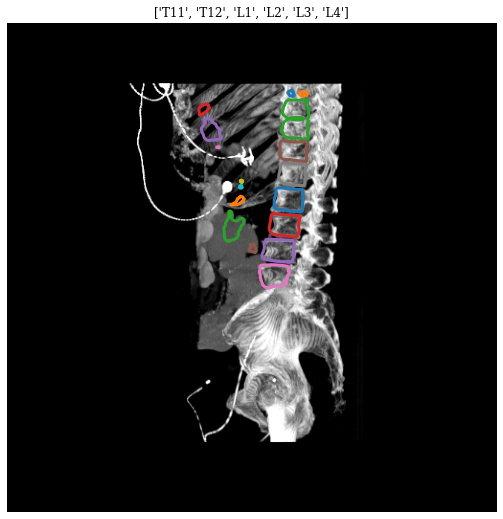

In [12]:
plot_mask(ids[37])